In [5]:
import os
from keras.models import load_model
os.chdir(r"C:\Users\Toshiba\Desktop\CNN MODEL")
model = load_model('model_5.h5')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


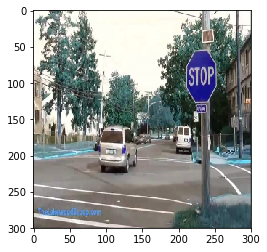

In [47]:
import cv2
imege = []
imgs = cv2.imread(r"C:\Users\Toshiba\Desktop\CNN MODEL\New folder\frame2.jpg")
imgs = cv2.resize(imgs,(300,300))
#imgs = cv2.cvtColor(imgs,cv2.COLOR_BGR2RGB)
#imege.append(imgs)
#imge = np.array(imege) 
#imge = imge[...,:3]
imgs.shape = [1,300,300,3]
imge = imgs/255
plt.imshow(imge[0])

In [48]:
pred = model.predict(imge)
pred = pred*300
pred

array([[188.11687 ,  44.9176  , 251.06784 , 127.960335]], dtype=float32)

In [50]:
int(pred[0][1])

44

In [36]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import os
os.chdir(r'C:\Users\Toshiba\Desktop\CNN MODEL\New folder')

In [53]:
import numpy as np
import cv2

cap = cv2.VideoCapture("Cyclists_not_stopping_at_stop_signs_-__City_of_Vancouver_Road_User_Safety(480p).mp4")

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('run.mp4',fourcc,30, (300,300))

while(cap.isOpened()):
    ret, frame = cap.read()
    
    if ret==True:
        img = cv2.resize(frame,(300,300))
        frame = cv2.resize(frame,(300,300))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img.shape = [1,300,300,3]
        img = img/255
        pred = model.predict(img)
        pred = pred*300
        if int(pred[0][0]) == 188 :
            pred[0][0] = 0
            pred[0][1] = 0
            pred[0][2] = 0
            pred[0][3] = 0
        frame = cv2.rectangle(frame,(int(pred[0][0]),int(pred[0][1])),(int(pred[0][2]),int(pred[0][3])),(0,255,0),1)
        # write the flipped frame
        out.write(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

array([156, 157, 152], dtype=uint8)